In [70]:
import uproot
import numpy as np
import pandas as pd
import awkward as ak
import vector
import matplotlib
import matplotlib.pyplot as plt

In [72]:
# Trees for dR < 0.4 cut matching
with uproot.open('/data/jchishol/mc16e/mntuple_ttbar_0_parton_ejets_fixed+match0d4.root') as og_file:
    reco_tree04 = og_file['reco'].arrays()
    parton_tree04 = og_file['parton'].arrays()

# Trees for dR < 0.6 cut matching
with uproot.open('/data/jchishol/mc16e/mntuple_ttbar_0_parton_ejets_fixed+match0d6.root') as og_file:
    reco_tree06 = og_file['reco'].arrays()
    parton_tree06 = og_file['parton'].arrays()

In [74]:
# Matching info for dR < 0.4 cut
match_data04 = np.array(np.load('matching_info/matching_info_0_parton_ejets0d4.npy'))
event_indices04 = match_data04[:,0].astype(int)
best_jets04 = match_data04[:,1].astype(int)
matched_pars04 = match_data04[:,2]
dRs04 = match_data04[:,3].astype(float)
frac_delta_pts04 = match_data04[:,4].astype(float)
num_events04 = len(parton_tree04['eventNumber'])
num_matched04 = len(dRs04)

print('For dR<0.4 matching:')
print('--------------------')
print('Total number of events: ', num_events04)
print('Number of matched pairs: ', num_matched04)
print('Percentage of matches with dR<0.4: %f%%' % (100*num_matched04/(4*num_events04)))
print('Percentage of these successful matches (i.e. dR < 0.4) that have frac pt > -1: %f%%' % (100*len(frac_delta_pts04[frac_delta_pts04>-1])/num_matched04))
print('Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ > -1: %f%%' % (100*len(frac_delta_pts04[frac_delta_pts04>-1])/(4*num_events04)))
print('Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ < -1: %f%%\n' % (100*len(frac_delta_pts04[frac_delta_pts04<-1])/(4*num_events04)))


# Matching info for dR < 0.46cut
match_data06 = np.array(np.load('matching_info/matching_info_0_parton_ejets0d6.npy'))
event_indices06 = match_data06[:,0].astype(int)
best_jets06 = match_data06[:,1].astype(int)
matched_pars06 = match_data06[:,2]
dRs06 = match_data06[:,3].astype(float)
frac_delta_pts06 = match_data06[:,4].astype(float)
num_events06 = len(parton_tree06['eventNumber'])
num_matched06 = len(dRs06)

print('For dR<0.6 matching:')
print('--------------------')
print('Total number of events: ', num_events06)
print('Number of matched pairs: ', num_matched06)
print('Percentage of matches with dR<0.6: %f%%' % (100*num_matched06/(4*num_events06)))
print('Percentage of these successful matches (i.e. dR < 0.6) that have frac pt > -1: %f%%' % (100*len(frac_delta_pts06[frac_delta_pts06>-1])/num_matched06))
print('Percentage of matches with dR<0.6 AND fractional $\Delta p_T$ > -1: %f%%' % (100*len(frac_delta_pts06[frac_delta_pts06>-1])/(4*num_events06)))
print('Percentage of matches with dR<0.6 AND fractional $\Delta p_T$ < -1: %f%%\n' % (100*len(frac_delta_pts06[frac_delta_pts06<-1])/(4*num_events06)))

For dR<0.4 matching:
--------------------
Total number of events:  765388
Number of matched pairs:  2640887
Percentage of matches with dR<0.4: 86.259747%
Percentage of these successful matches (i.e. dR < 0.4) that have frac pt > -1: 98.340255%
Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ > -1: 84.828055%
Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ < -1: 1.431692%

For dR<0.6 matching:
--------------------
Total number of events:  765388
Number of matched pairs:  2706139
Percentage of matches with dR<0.6: 88.391084%
Percentage of these successful matches (i.e. dR < 0.6) that have frac pt > -1: 97.882407%
Percentage of matches with dR<0.6 AND fractional $\Delta p_T$ > -1: 86.519321%
Percentage of matches with dR<0.6 AND fractional $\Delta p_T$ < -1: 1.871763%



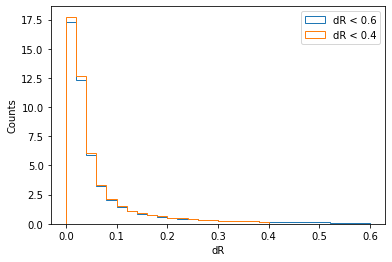

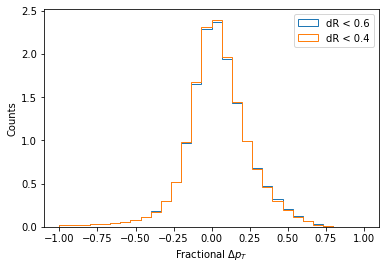

In [75]:
plt.figure('dR')
plt.hist(dRs06,bins=30,range=(0,0.6),label='dR < 0.6',density=True,histtype='step')
plt.hist(dRs04,bins=30,range=(0,0.6),label='dR < 0.4',density=True,histtype='step')
plt.xlabel('dR')
plt.ylabel('Counts')
plt.legend()
plt.show()

plt.figure('frac_delta_pt')
plt.hist(frac_delta_pts06,bins=30,range=(-1,1),label='dR < 0.6',density=True,histtype='step')
plt.hist(frac_delta_pts04,bins=30,range=(-1,1),label='dR < 0.4',density=True,histtype='step')
plt.xlabel('Fractional $\Delta p_T$')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [90]:
# dR < 0.4 dataframes
print('For dR < 0.4 matching:')
print('----------------------')
print('All data:')
df04 = pd.DataFrame({'Event':event_indices04, 'Jet':best_jets04,'Parent': matched_pars04, 'dR':dRs04.round(3), 'frac delta pt':frac_delta_pts04.round(3)})
#df_grouped04 = df04.groupby(['Event'], as_index=True).agg({'Jet': list,'Parent': list,'dR': list,'frac delta pt': list})
print(df04)
print('Not great matches:')
df04_bad = df04[df04['frac delta pt']<-1]
print(df04_bad)

# dR < 0.6 dataframes
print('For dR < 0.6 matching:')
print('----------------------')
print('All data:')
df06 = pd.DataFrame({'Event':event_indices06, 'Jet':best_jets06,'Parent': matched_pars06, 'dR':dRs06.round(3), 'frac delta pt':frac_delta_pts06.round(3)})
#df_grouped06 = df06.groupby(['Event'], as_index=True).agg({'Jet': list,'Parent': list,'dR': list,'frac delta pt': list})
print(df06)
print('Not great matches:')
df06_bad = df06[df06['frac delta pt']<-1]
print(df06_bad)


For dR < 0.4 matching:
----------------------
All data:
          Event  Jet             Parent     dR  frac delta pt
0             0    0           b_from_t  0.018         -0.147
1             0    4        b_from_tbar  0.273          0.234
2             0    2  Wdecay1_from_tbar  0.034          0.066
3             0    3  Wdecay2_from_tbar  0.018          0.012
4             1    1           b_from_t  0.031          0.005
...         ...  ...                ...    ...            ...
2640882  765386    3     Wdecay1_from_t  0.131          0.126
2640883  765386    2     Wdecay2_from_t  0.085         -0.270
2640884  765387    0           b_from_t  0.007         -0.029
2640885  765387    1        b_from_tbar  0.012          0.150
2640886  765387    4     Wdecay2_from_t  0.017         -0.249

[2640887 rows x 5 columns]
Not great matches:
          Event  Jet             Parent     dR  frac delta pt
32            9    0  Wdecay2_from_tbar  0.142         -1.267
234          72    2  Wdecay1

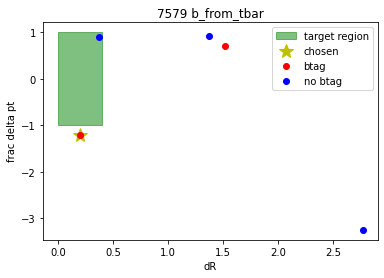

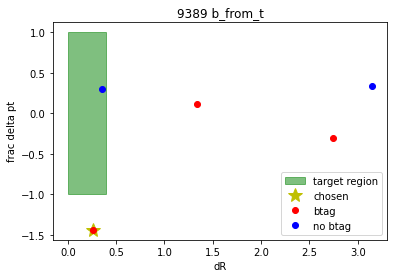

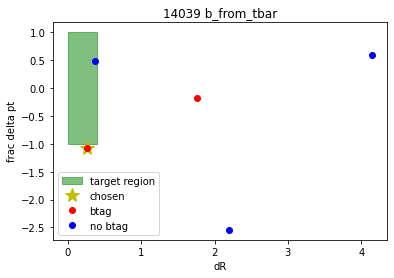

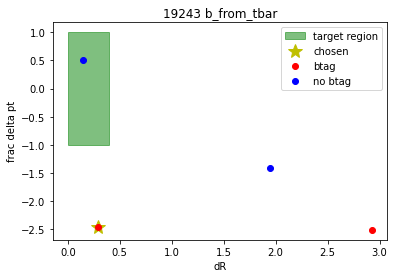

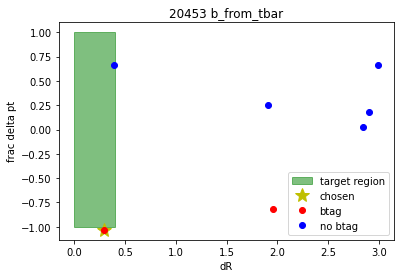

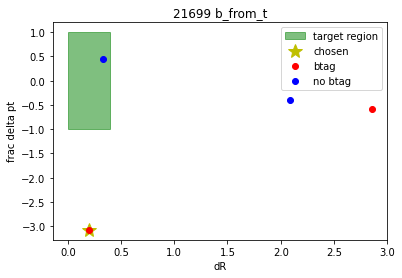

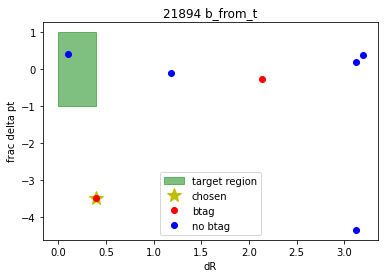

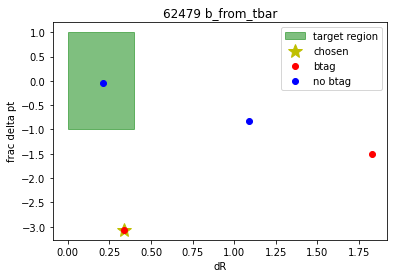

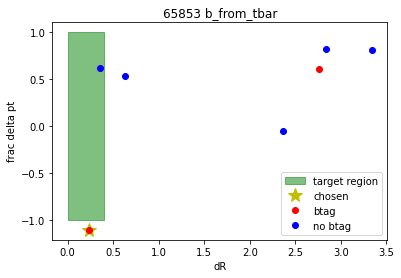

KeyboardInterrupt: 

In [91]:
# Calculate particle vectors
b_from_t_vec = vector.array({"pt":parton_tree04['MC_b_from_t_afterFSR_pt'],"eta":parton_tree04['MC_b_from_t_afterFSR_eta'],"phi":parton_tree04['MC_b_from_t_afterFSR_phi'],"E":parton_tree04['MC_b_from_t_afterFSR_E']})
b_from_tbar_vec = vector.array({"pt":parton_tree04['MC_b_from_tbar_afterFSR_pt'],"eta":parton_tree04['MC_b_from_tbar_afterFSR_eta'],"phi":parton_tree04['MC_b_from_tbar_afterFSR_phi'],"E":parton_tree04['MC_b_from_tbar_afterFSR_E']})
Wdecay1_from_t_vec = vector.array({"pt":parton_tree04['MC_Wdecay1_from_t_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay1_from_t_afterFSR_eta'],"phi":parton_tree04['MC_Wdecay1_from_t_afterFSR_phi'],"E":parton_tree04['MC_Wdecay1_from_t_afterFSR_E']})
Wdecay2_from_t_vec = vector.array({"pt":parton_tree04['MC_Wdecay2_from_t_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay2_from_t_afterFSR_y'],"phi":parton_tree04['MC_Wdecay2_from_t_afterFSR_phi'],"E":parton_tree04['MC_Wdecay2_from_t_afterFSR_E']})   # Approx eta with y for now, since eta empty
Wdecay1_from_tbar_vec = vector.array({"pt":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_eta'],"phi":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_phi'],"E":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_E']})
Wdecay2_from_tbar_vec = vector.array({"pt":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_eta'],"phi":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_phi'],"E":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_E']})


for i,event in enumerate(list(df04_bad['Event'])):

    dR_points_btag = []
    dR_points_nobtag = []
    pt_points_btag = []
    pt_points_nobtag = []

    min_dR = 100000
    and_the_pt = 0

    plot = False


    par = list(df04_bad['Parent'])[i]

    if par=='b_from_t':
        par_vec=b_from_t_vec[event]
    elif par=='b_from_tbar':
        par_vec=b_from_tbar_vec[event]
    elif par=='Wdecay1_from_t':
        par_vec=Wdecay1_from_t_vec[event]
    elif par=='Wdecay2_from_t':
        par_vec=Wdecay2_from_t_vec[event]
    elif par=='Wdecay1_from_tbar':
        par_vec=Wdecay1_from_tbar_vec[event]
    elif par=='Wdecay2_from_tbar':
        par_vec=Wdecay2_from_tbar_vec[event]


    for j in range(int(reco_tree04['jet_n'][event])):
        jet_vec = vector.obj(pt=reco_tree04['jet_pt'][event][j],eta=reco_tree04['jet_eta'][event][j],phi=reco_tree04['jet_phi'][event][j],E=reco_tree04['jet_e'][event][j])
        this_dR = par_vec.deltaR(jet_vec)
        this_pt = (par_vec.pt-jet_vec.pt)/par_vec.pt
        
        if reco_tree04['jet_btagged'][event][j]==1:
            dR_points_btag.append(this_dR)
            pt_points_btag.append(this_pt)
        else:
            dR_points_nobtag.append(this_dR)
            pt_points_nobtag.append(this_pt)

        if this_dR < 0.4 and this_pt > -1:
            plot = True


    if plot==True:


        plt.figure(str(event))
        plt.title(str(event)+' '+par)

        rect1 = matplotlib.patches.Rectangle((0,-1), 0.4, 2, color='green',alpha=0.5,label='target region')
        plt.gca().add_patch(rect1)  # gca = 'grab current axis
        plt.plot([list(df04_bad['dR'])[i]],[list(df04_bad['frac delta pt'])[i]],'y*',markersize=15,label='chosen')
        plt.plot(dR_points_btag,pt_points_btag,'ro',label='btag')
        plt.plot(dR_points_nobtag,pt_points_nobtag,'bo',label='no btag')

        plt.legend()
        plt.xlabel('dR')
        plt.ylabel('frac delta pt')
        plt.show()